In [ ]:
!pip install pandas
!pip install numpy

In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [32]:
# Import du CSV
df = pd.read_csv('/content/student_depression_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

# Les données
**id :** *Identification unique*

**Gender :** *Genre de l'étudiant*

**Age :** *Age de l'étudiant*

**City :** *Ville de l'étudiant*

**Profession :** *Profession de l'étudiant*

**Academic Pressure :** *Pression des études (note de 0 à 5)*

**Work pressure :** *Pression du travail (note de 0 à 5)*

**CGPA :** *Moyenne des notes*

**Study Satisfaction :** *Satisfaction des études (note de 0 à 5)*

**Job Satisfaction :** *Satisfaction du travail (note de 0 à 5)*

**Sleep duration :** *temps de sommeil*

**Dietary Habits :** *Habitudes alimentaires*

**Degree :** *Diplôme*

**Have you ever had suicidal thoughts ? :** *Avez-vous déjà eu des pensées suicidaires ?*

**Word/Study Hours :** *Heures de travail ou d'études*

**Financial Stress :** *Stress financier*

**Family History of Mental Illness :** Historique de maladie mentale au sein de la famille
*texte en italique*
**Depression :** *État de dépression (1 ou 0)*

In [33]:
# Affichage des premières lignes
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [34]:
# Transformation des valeurs de Depression pour les rendre plus compréhensibles
df['Depression'] = df['Depression'].replace({1: 'Oui', 0: 'Non'})
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,Oui
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,Non
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,Non
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,Oui
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,Non


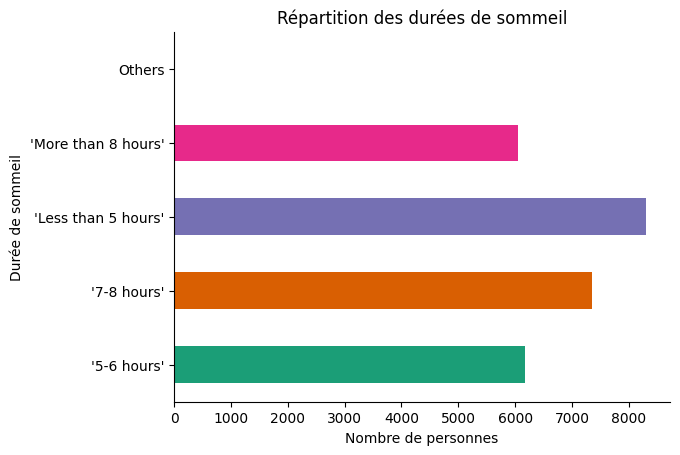

In [35]:
# Création du graphique
df.groupby('Sleep Duration').size().plot(
    kind='barh',
    color=sns.palettes.mpl_palette('Dark2')
)

# Style
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Répartition des durées de sommeil')
plt.xlabel('Nombre de personnes')
plt.ylabel('Durée de sommeil')


# Affichage
plt.show()


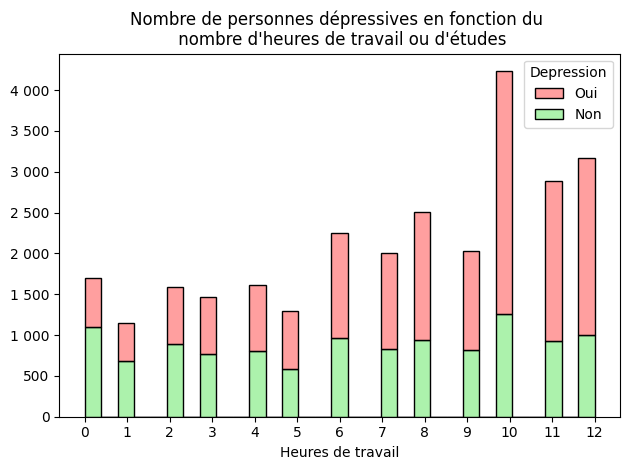

In [47]:
palette = {"Oui": '#ff7f7f', "Non": '#90ee90'}

# Création du graphique
sns.histplot(data=df, x='Work/Study Hours', hue='Depression', multiple='stack', palette=palette)
plt.title('Nombre de personnes dépressives en fonction du \n nombre d\'heures de travail ou d\'études')
plt.xlabel('Heures de travail')
plt.ylabel('')

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

# Formateur pour ajouter un espace pour les milliers
def format_number(x, pos):
    return f'{int(x):,}'.replace(',', ' ')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

plt.tight_layout()
plt.savefig('depression_by_hours_work.pdf', format='pdf')

plt.show()